# Inspecting the Model Acc Test Results

In [1]:
import pandas as pd
import numpy 
import pandas
from  matplotlib import pyplot
import seaborn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
experiments = pd.read_csv('model_search/' + 'all_model_runs.csv')
experiments = experiments[~(experiments.evaluation_dataset == '2000test')]
experiments.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1,...,model_name,overall_acc,tile_size,time_steps,train_count,training_time,water_acc_prod,water_acc_user,wetland_acc_prod,wetland_acc_user
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,mlp,0.956944,9,5,1500.0,0 days 00:04:10.593986000,1.000,0.976,0.925,0.957
1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,mlp,0.948611,9,5,1500.0,0 days 00:04:10.593986,0.992,0.983,0.958,0.935
3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,cnn,0.954167,9,5,1500.0,0 days 00:04:10.936465,0.992,0.975,0.942,0.919
4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,cnn,0.950000,9,5,1500.0,0 days 00:04:10.936465,0.975,1.000,1.000,0.857
6,6,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,rcnn,0.968056,9,5,1500.0,0 days 00:04:08.818175,1.000,1.000,0.958,0.966


(0.5, 1)

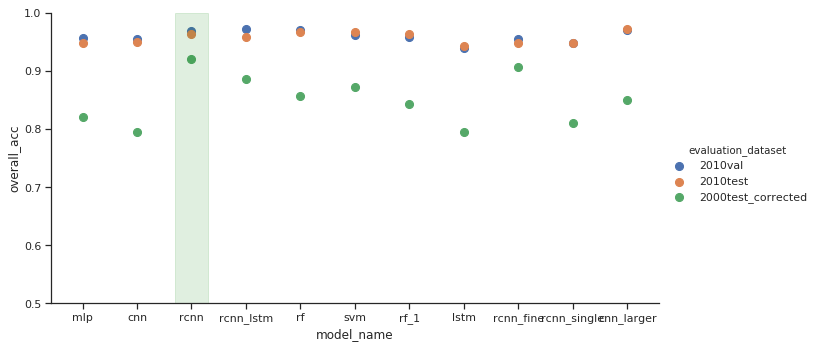

In [3]:
seaborn.set(style='ticks')


fg = seaborn.FacetGrid(data=experiments, hue='evaluation_dataset', height=5, aspect=1.95)
fg.map(pyplot.scatter, 'model_name', 'overall_acc', s=65).add_legend()
plt.axvspan(1.7, 2.3, alpha=0.12, color='green')
plt.ylim(0.5, 1)
#plt.savefig('model_comparisons.png', dpi=600)

(0.6, 1)

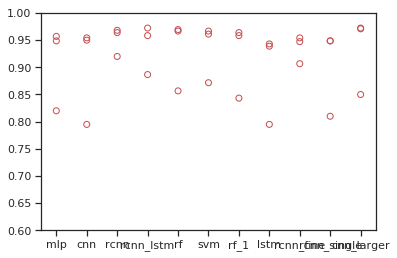

In [4]:

fig, ax = plt.subplots()

ax.scatter(experiments['model_name'], experiments['overall_acc'], facecolors='none', edgecolors='r')
ax.set_ylim(.6,1)

In [5]:
from random import uniform

x_spacing = []
for index, exp in experiments.iterrows():
    if exp['model_name'] == 'mlp':
        x_location = 1
    elif exp['model_name'] == 'cnn':
        x_location = 2
    elif exp['model_name'] == 'rcnn':
        x_location = 3
    elif exp['model_name'] == 'rcnn_lstm':
        x_location = 4
    elif exp['model_name'] == 'rf':
        x_location = 5
    elif exp['model_name'] == 'svm':
        x_location = 6
    elif exp['model_name'] == 'rf_1':
        x_location = 7
    elif exp['model_name'] == 'lstm':
        x_location = 8
    elif exp['model_name'] == 'rcnn_fine':
        x_location = 9
    elif exp['model_name'] == 'rcnn_single':
        x_location = 10
        
    if exp['evaluation_dataset'] == '2000test_corrected':
        x_location += 0.3
    elif exp['evaluation_dataset'] == '2010test':
        x_location += 0
    elif exp['evaluation_dataset'] == '2010val':
        x_location -= 0.3
    x_location += uniform(0, 0.03)
    x_spacing.append(x_location)
x_spacing

[0.7039544216355924,
 1.0244444179255712,
 1.7167587717567985,
 2.0212462786077237,
 2.7136918802600127,
 3.00707936755769,
 4.010286342598339,
 3.713203188826628,
 4.715166044601041,
 5.0116402559550055,
 6.010530555808155,
 5.72341032480552,
 6.718669295113225,
 7.015999030022646,
 7.707426035159013,
 8.021539478772304,
 9.016523995970157,
 8.72244453037452,
 3.325541522219904,
 2.319354896571535,
 1.3280295078193722,
 4.329513567114524,
 8.311526592696318,
 9.321976508341239,
 7.328946100220755,
 6.312460047728219,
 5.31979781418652,
 10.327245398616366,
 10.012581800895093,
 9.714003986674992,
 10.01427602044761,
 10.016130462335104,
 9.7383731717329]

In [6]:
x_spacing = np.array(x_spacing)

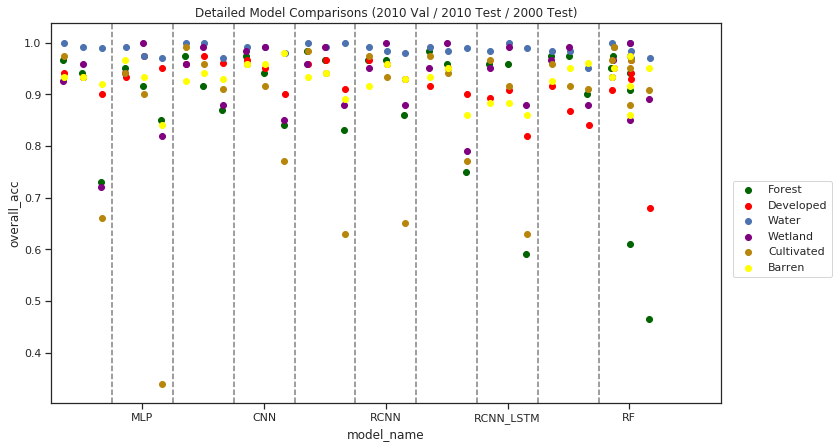

In [7]:
fig, ax = plt.subplots(figsize=(12,7))

jitter = 0.01

ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['forest_acc_prod'], label='Forest', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['dev_acc_prod'], label='Developed', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['water_acc_prod'], label='Water', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['wetland_acc_prod'], label='Wetland', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['cult_acc_prod'], label='Cultivated', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing+[uniform(-jitter, jitter)] * (len(x_spacing)), experiments['barren_acc_prod'], label='Barren', marker='o', facecolors='yellow', edgecolors='yellow')
#ax.set_ylim(0.30,1.01)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=9.5, c='black', linestyle='--', alpha=0.5)
ax.set_xlim(0.5,11.5)

ax.set_xticklabels(['empty', 'MLP', 'CNN', 'RCNN', 'RCNN_LSTM', 'RF', 'SVM', 'RF_1', 'LSTM', 'RCNN_FINE', 'RCNN_SINGLE'])
ax.set_xlabel('model_name')
ax.set_ylabel('overall_acc')
ax.set_title('Detailed Model Comparisons (2010 Val / 2010 Test / 2000 Test)')
ax.legend(bbox_to_anchor=(1.01, 0.6))
#fig.savefig('detailed_model_comparisons.png', bbox_inches='tight', dpi=600)

In [8]:
experiments = experiments[~(experiments.evaluation_dataset == '2010val')]

In [9]:
experiments = experiments[~(experiments.model_name == 'cnn')]

In [10]:
experiments[experiments.evaluation_dataset == '2000test_corrected'].sort_values(by=['overall_acc'])['model_name']

31           lstm
36    rcnn_single
29            mlp
33           rf_1
39     cnn_larger
35             rf
34            svm
30      rcnn_lstm
32      rcnn_fine
27           rcnn
Name: model_name, dtype: object

In [11]:
from random import uniform

x_spacing = []
for index, exp in experiments.iterrows():
    if exp['model_name'] == 'rcnn':
        x_location = 1
    elif exp['model_name'] == 'rcnn_fine':
        x_location = 2
    elif exp['model_name'] == 'rcnn_lstm':
        x_location = 3
    elif exp['model_name'] == 'svm':
        x_location = 4
    elif exp['model_name'] == 'rf':
        x_location = 5
    elif exp['model_name'] == 'cnn_larger':
        x_location = 6
    elif exp['model_name'] == 'rf_1':
        x_location = 7
    elif exp['model_name'] == 'mlp':
        x_location = 8
    elif exp['model_name'] == 'rcnn_single':
        x_location = 9
    elif exp['model_name'] == 'lstm':
        x_location = 10
        
    if exp['evaluation_dataset'] == '2000test_corrected':
        x_location += 0.2
    elif exp['evaluation_dataset'] == '2010test':
        x_location += -0.2
    #x_location += uniform(0, 0.03)
    x_spacing.append(x_location)

In [12]:
len(x_spacing)

20

In [13]:
x_spacing

[7.8,
 0.8,
 2.8,
 4.8,
 3.8,
 6.8,
 9.8,
 1.8,
 1.2,
 8.2,
 3.2,
 10.2,
 2.2,
 7.2,
 4.2,
 5.2,
 9.2,
 8.8,
 6.2,
 5.8]

In [14]:
experiments['overall_acc']

1     0.948611
7     0.963889
10    0.958333
13    0.966667
16    0.966667
19    0.963889
22    0.943056
25    0.947222
27    0.920000
29    0.820000
30    0.886667
31    0.795000
32    0.906667
33    0.843333
34    0.871667
35    0.856667
36    0.810000
37    0.948611
39    0.850000
40    0.972222
Name: overall_acc, dtype: float64

In [15]:
experiments[experiments['evaluation_dataset'] == '2000test_corrected'][['model_name', 'overall_acc']]

,model_name,overall_acc
27,rcnn,0.920000
29,mlp,0.820000
30,rcnn_lstm,0.886667
31,lstm,0.795000
32,rcnn_fine,0.906667
33,rf_1,0.843333
34,svm,0.871667
35,rf,0.856667
36,rcnn_single,0.810000
39,cnn_larger,0.850000


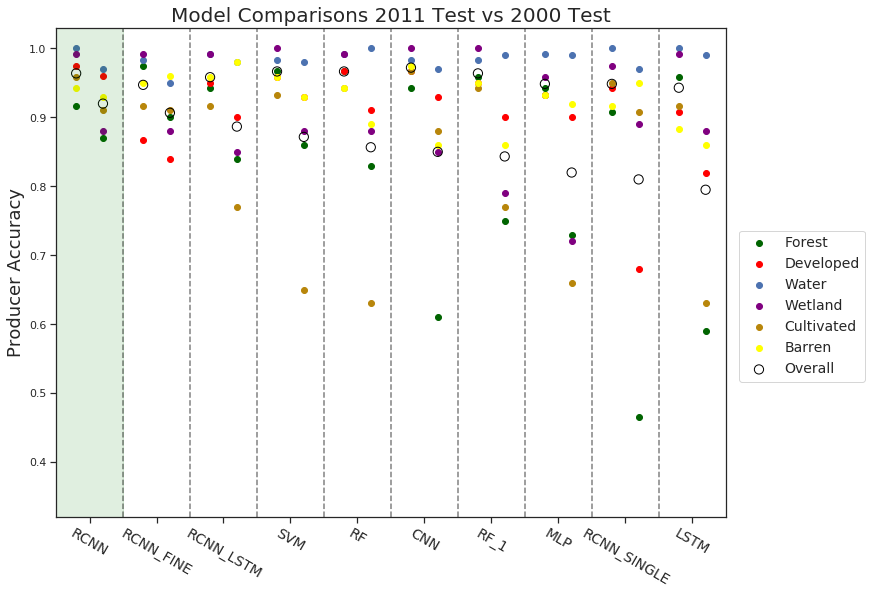

In [16]:
fig, ax = plt.subplots(figsize=(12,9))

ax.scatter(x_spacing, experiments['forest_acc_prod'], label='Forest', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing, experiments['dev_acc_prod'], label='Developed', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing, experiments['water_acc_prod'], label='Water', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing, experiments['wetland_acc_prod'], label='Wetland', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing, experiments['cult_acc_prod'], label='Cultivated', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing, experiments['barren_acc_prod'], label='Barren', marker='o', facecolors='yellow', edgecolors='yellow')

ax.scatter(x_spacing, experiments['overall_acc'], label='Overall', marker='o', facecolors='None', edgecolors='black', s=85)



ax.set_ylim(0.32,1.03)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=9.5, c='black', linestyle='--', alpha=0.5)
ax.axvspan(0.5, 1.5, alpha=0.12, color='green')

ax.set_xlim(0.5,10.5)


ax.set_xticklabels(['RCNN', 'RCNN_FINE', 'RCNN_LSTM', 'SVM', 'RF', 'CNN', 'RF_1', 'MLP', 'RCNN_SINGLE', 'LSTM'], rotation=-30, fontsize=14)
ax.set_xticks(np.arange(1, 11, step=1))
#ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Producer Accuracy', fontsize=18)
ax.set_title('Model Comparisons 2011 Test vs 2000 Test', fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 0.6), fontsize=14)
#fig.savefig('detailed_model_comparisons_rev_update.png', bbox_inches='tight', dpi=600)

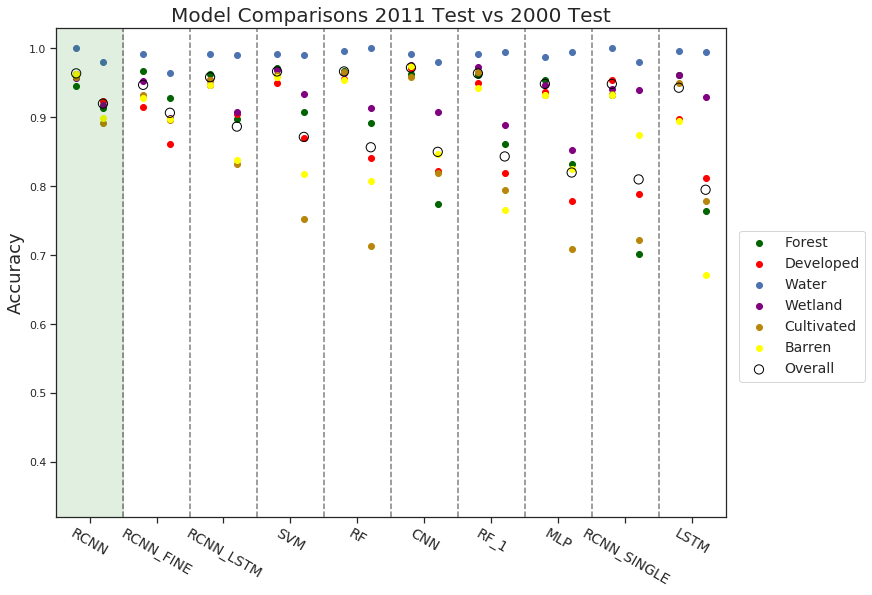

In [26]:
fig, ax = plt.subplots(figsize=(12,9))

ax.scatter(x_spacing, (experiments['forest_acc_prod']+experiments['forest_acc_user'])/2.0, 
           label='Forest', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing, (experiments['dev_acc_prod']+experiments['dev_acc_user'])/2.0, 
           label='Developed', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing, (experiments['water_acc_prod']+experiments['water_acc_user'])/2.0, 
           label='Water', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing, (experiments['wetland_acc_prod']+experiments['wetland_acc_user'])/2.0, 
           label='Wetland', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing, (experiments['cult_acc_prod']+experiments['cult_acc_user'])/2.0, 
           label='Cultivated', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing, (experiments['barren_acc_prod']+experiments['barren_acc_user'])/2.0, 
           label='Barren', marker='o', facecolors='yellow', edgecolors='yellow')

ax.scatter(x_spacing, experiments['overall_acc'], label='Overall', marker='o', facecolors='None', edgecolors='black', s=85)



ax.set_ylim(0.32,1.03)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=9.5, c='black', linestyle='--', alpha=0.5)
ax.axvspan(0.5, 1.5, alpha=0.12, color='green')

ax.set_xlim(0.5,10.5)


ax.set_xticklabels(['RCNN', 'RCNN_FINE', 'RCNN_LSTM', 'SVM', 'RF', 'CNN', 'RF_1', 'MLP', 'RCNN_SINGLE', 'LSTM'], rotation=-30, fontsize=14)
ax.set_xticks(np.arange(1, 11, step=1))
#ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=18)
ax.set_title('Model Comparisons 2011 Test vs 2000 Test', fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 0.6), fontsize=14)
fig.savefig('detailed_model_comparisons_rev_update_prod_user_avg.png', bbox_inches='tight', dpi=600)

Harmonic mean

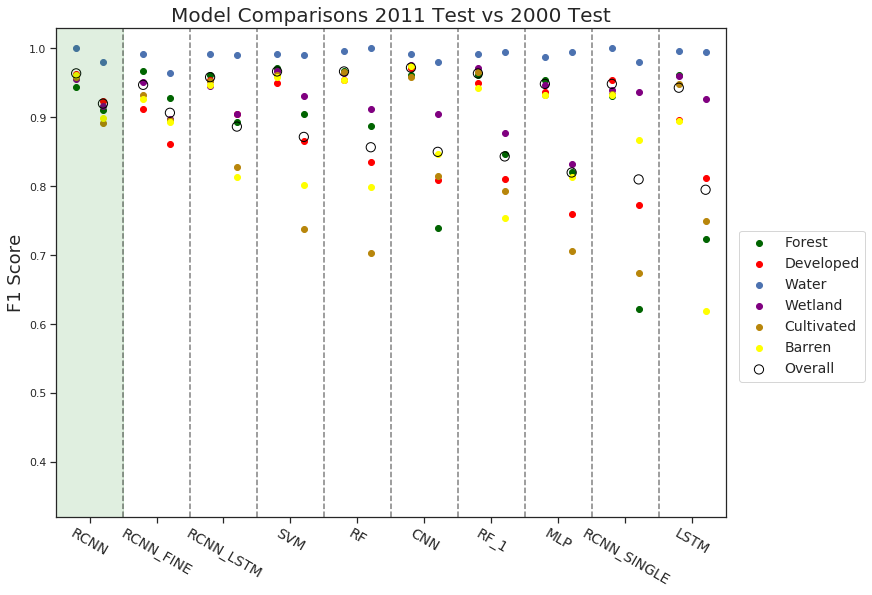

In [19]:
fig, ax = plt.subplots(figsize=(12,9))

ax.scatter(x_spacing, (2/(1/experiments['forest_acc_prod']+1/experiments['forest_acc_user'])), 
           label='Forest', marker='o', facecolors='darkgreen', edgecolors='darkgreen')
ax.scatter(x_spacing, (2/(1/experiments['dev_acc_prod']+1/experiments['dev_acc_user'])), 
           label='Developed', marker='o', facecolors='red', edgecolors='red')
ax.scatter(x_spacing, (2/(1/experiments['water_acc_prod']+1/experiments['water_acc_user'])), 
           label='Water', marker='o', facecolors='b', edgecolors='b')
ax.scatter(x_spacing, (2/(1/experiments['wetland_acc_prod']+1/experiments['wetland_acc_user'])), 
           label='Wetland', marker='o', facecolors='purple', edgecolors='purple')
ax.scatter(x_spacing, (2/(1/experiments['cult_acc_prod']+1/experiments['cult_acc_user'])), 
           label='Cultivated', marker='o', facecolors='darkgoldenrod', edgecolors='darkgoldenrod')
ax.scatter(x_spacing, (2/(1/experiments['barren_acc_prod']+1/experiments['barren_acc_user'])), 
           label='Barren', marker='o', facecolors='yellow', edgecolors='yellow')

ax.scatter(x_spacing, experiments['overall_acc'], label='Overall', marker='o', facecolors='None', edgecolors='black', s=85)



ax.set_ylim(0.32,1.03)

ax.axvline(x=1.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=2.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=3.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=4.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=5.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=6.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=7.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=8.5, c='black', linestyle='--', alpha=0.5)
ax.axvline(x=9.5, c='black', linestyle='--', alpha=0.5)
ax.axvspan(0.5, 1.5, alpha=0.12, color='green')

ax.set_xlim(0.5,10.5)


ax.set_xticklabels(['RCNN', 'RCNN_FINE', 'RCNN_LSTM', 'SVM', 'RF', 'CNN', 'RF_1', 'MLP', 'RCNN_SINGLE', 'LSTM'], rotation=-30, fontsize=14)
ax.set_xticks(np.arange(1, 11, step=1))
#ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('F1 Score', fontsize=18)
ax.set_title('Model Comparisons 2011 Test vs 2000 Test', fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 0.6), fontsize=14)
fig.savefig('detailed_model_comparisons_rev_update_harmonic_mean.png', bbox_inches='tight', dpi=600)

In [359]:
experiments_trained = experiments[~(experiments.evaluation_dataset == '2000test_corrected')]
experiments_trained['timestamp'] = pd.to_datetime(experiments_trained['training_time'].str.slice(7))
experiments_trained['time'] = experiments_trained['timestamp'].dt.hour * 3600 + experiments_trained['timestamp'].dt.minute * 60 + experiments_trained['timestamp'].dt.second

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


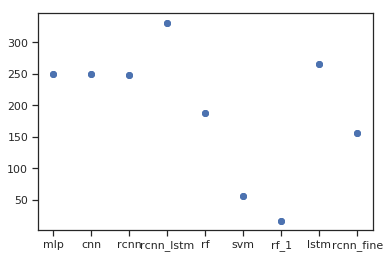

In [361]:
fig, ax = plt.subplots()
ax.scatter(experiments_trained['model_name'], experiments_trained['time'])# facecolors='none', edgecolors='r')
#ax.set_ylim(.6,1)